## Data Analysis

Like the real analysts!

In [35]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/launch_04.csv', sep=None)
data

/var/folders/rs/4ym7352x37df592tnnlbw2mm0000gn/T/ipykernel_52908/859546965.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('data/launch_04.csv', sep=None)


,Time (milliseconds),ax,ay,az,mx,my,mz,ts,alti
0,350676,48,-32,-1056,18000,12750,79950,350653,395.6435
1,350731,64,-48,-544,18150,13200,79800,350710,396.2592
2,350764,80,-48,-1216,18300,13200,79800,350743,395.3079
3,350795,64,-64,-992,19050,12000,80850,350774,395.8892
4,350860,96,-80,-1056,18300,12450,80400,350838,395.3079
...,...,...,...,...,...,...,...,...,...
2192,460091,960,-208,112,-48300,1950,40500,460070,392.0368
2193,460140,960,-176,144,-47850,3000,40500,460117,392.1953
2194,460193,976,-192,144,-47700,3450,40050,460172,392.8427
2195,460262,976,-192,112,-48000,2250,40350,460238,392.5996


In [36]:
# Compute total acceleration as L2-distance of 3d acceleration vector.
data['total_acceleration'] = np.sqrt(data['ax']**2 + data['ay']**2 + data['az']**2)
# Compute height over ground, use 10% quantile as ground level.
data['height_over_ground'] = data['alti'] - data['alti'].quantile(0.1)


In [60]:
# Limit time range to flight phase
data = data[data['ts'] > 408000]
data = data[data['ts'] < 418000]



np.int64(1222)

411707.0 38.44509999999997


<Axes: xlabel='Time (ms)', ylabel='Height Over Ground [m]'>

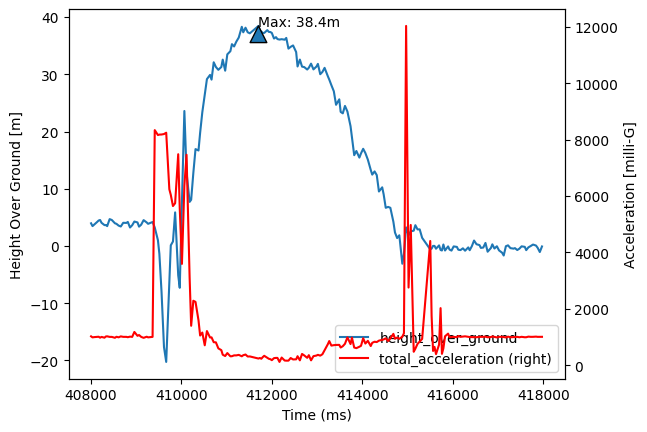

In [75]:
import matplotlib.pyplot as plt

# Dein ursprünglicher Plot
ax = data.plot(x='ts', y=['height_over_ground'])

# Daten für die zweite Achse plotten
data.plot(xlabel="foo", x='ts', y=['total_acceleration'], secondary_y=True, ax=ax, color='r')

# Achsenbeschriftungen hinzufügen
ax.set_ylabel('Height Over Ground [m]')
ax.right_ax.set_ylabel('Acceleration [milli-G]')
ax.set_xlabel("Time (ms)")

max_idx = data['height_over_ground'].idxmax()
max_ts = data.loc[max_idx]['ts']
max_height = data['height_over_ground'].max()
print(max_ts, max_height)
ax.annotate(text=f'Max: {max_height:.1f}m', xy=(max_ts, max_height), arrowprops={'width':3})

ax